In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [2]:
data = pd.read_csv('bbc/BBC News Train.csv')

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer(language='english')

y = data['Category'].tolist()



In [3]:
def normalizer(text):
    text = re.sub(r'[^a-zA-z]', ' ', text).lower()
    word_tokens = word_tokenize(text)
    filtered_sentence = [stemmer.stem(w) for w in word_tokens if not w in stop_words and len(w) > 2]
    return filtered_sentence

In [4]:
def feature(data):
    feature_list = data['Text'].tolist()
    return feature_list

In [5]:
def vectorize(feature_list):
    X_dtm = vect.fit_transform(feature_list)
    X_dtm = X_dtm.toarray()
    return X_dtm

In [6]:
def feature_selection(k, X_dtm, y):
    global chi2_features
    chi2_features = SelectKBest(chi2, k=k)
    X_kbest_features = chi2_features.fit_transform(X_dtm, y)
    return X_kbest_features

In [7]:
def proc(data):
    tokens = feature(data)
    transform_data = vect.transform(tokens).toarray()
    selection_feature = chi2_features.transform(transform_data)
    return selection_feature


In [8]:
train_data , test_data , y_train, y_test = train_test_split(data, y, test_size=0.10, random_state=2)

In [9]:
vect = CountVectorizer(tokenizer=normalizer)

X_dtm = vectorize(feature(train_data))
X_train = feature_selection(2000, X_dtm, y_train)

X_test = proc(test_data)

In [10]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
predict_val_nb = clf.predict(X_test)
print(classification_report(y_test, predict_val_nb))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97        34
entertainment       0.97      1.00      0.98        31
     politics       1.00      0.93      0.96        28
        sport       1.00      1.00      1.00        28
         tech       0.90      0.93      0.91        28

     accuracy                           0.97       149
    macro avg       0.97      0.97      0.97       149
 weighted avg       0.97      0.97      0.97       149



<AxesSubplot:>

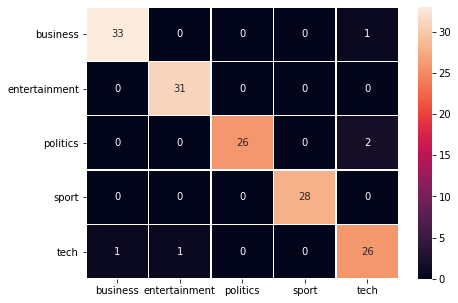

In [11]:
array = confusion_matrix(y_test, predict_val_nb)
df_cm = pd.DataFrame(array, index = ['business', 'entertainment', 'politics', 'sport', 'tech'],
                  columns = ['business', 'entertainment', 'politics', 'sport', 'tech'])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True, linewidths=.5)